# 과제1-회귀 모델링과 다양한 실험

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프 함수 만들기

In [2]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Income 	|	가구당 평균 소득액(1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(범주 : Bad, Medium, Good)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Education 	|	 교육수준(범주 : 10~18)	|	feature	|
|	Urban 	|	 매장이 도심에 있는지 여부(범주 : Yes, No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(범주 : Yes, No)	|	feature	|


## 2.데이터 준비

### (1) 데이터 준비
* x, y로 분할

In [4]:
target = 'Sales'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (2) 가변수화
* 범주형 변수에 대해서 가변수화를 수행하시오.

In [5]:
cat_cols = ['ShelveLoc','Education', 'Urban', 'US']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)
x.head()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_Yes,US_Yes
0,138,73,11,276,120,42,False,False,False,False,False,False,False,False,True,False,True,True
1,111,48,16,260,83,65,True,False,False,False,False,False,False,False,False,False,True,True
2,113,35,10,269,80,59,False,True,False,True,False,False,False,False,False,False,True,True
3,117,100,4,466,97,55,False,True,False,False,False,True,False,False,False,False,True,True
4,141,64,3,340,128,38,False,False,False,False,True,False,False,False,False,False,True,False


### (3) 데이터분할
* train, val 분할

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=.2, random_state=20)

### (4) Scaling

In [7]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링

* 히든레이어를 추가한 모델 두 개 이상을 생성한 후
* 성능을 비교하시오.
* 성능을 높이기 위해서 조절할 것들
    * 히든레이어 수
    * 히든레이어 노드수
    * epochs 수
    * learning_rate : 0.1 ~ 0.0001 사이에서 조정(예 Adam(learning_rate = 0.01))


### (1) 모델1

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [8]:
nfeatures = x_train.shape[1]
nfeatures

18

In [9]:
clear_session()

model1 = Sequential([Input(shape = (nfeatures,)),
                    Dense(5, activation = 'relu'),
                    Dense(1) ] )

* 컴파일 + 학습

In [10]:
model1.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')

* 학습곡선

In [11]:
hist = model1.fit(x_train, y_train, epochs = 50 , validation_split= .2 ).history

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 70.5708 - val_loss: 59.9182
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 62.7421 - val_loss: 54.9925
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 55.7972 - val_loss: 48.8025
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 52.4375 - val_loss: 41.4131
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 42.7339 - val_loss: 33.3341
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 33.2291 - val_loss: 25.2870
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 24.4606 - val_loss: 18.3047
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18.4321 - val_loss: 13.0914
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.9172 - val_loss: 10.2404
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.4604 - val_loss: 9.2422
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.6034 - val_loss: 9.2863
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.4784 - 

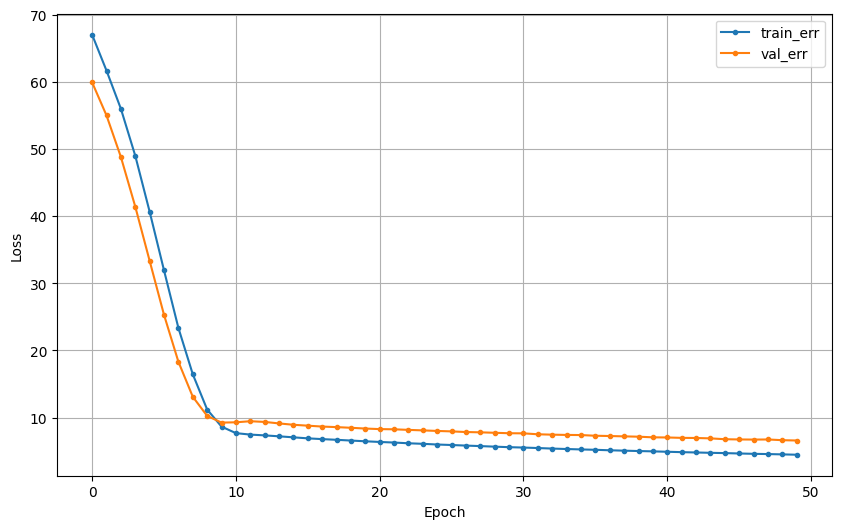

In [12]:
dl_history_plot(hist)

* 검증 평가
    * rmse, mae 로 평가하기

In [13]:
pred1 = model1.predict(x_val)
print(f'RMSE : {root_mean_squared_error(y_val, pred1)}')
print(f'MAE  : {mean_absolute_error(y_val, pred1)}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
RMSE : 2.581702589183132
MAE  : 2.0825605936050415


### (2) 모델2

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [14]:
clear_session()

model2 = Sequential([Input(shape = (nfeatures,)),
                    Dense(5, activation = 'relu'),
                    Dense(2, activation = 'relu'),
                    Dense(1) ] )

* 컴파일 + 학습

In [15]:
model2.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')

* 학습곡선

In [16]:
hist = model2.fit(x_train, y_train, epochs = 50 , validation_split= .2 ).history

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 49.6529 - val_loss: 33.1158
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 31.8829 - val_loss: 16.3958
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.5138 - val_loss: 9.6155
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.9729 - val_loss: 11.6657
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.5363 - val_loss: 9.3809
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.3845 - val_loss: 8.5693
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.3563 - val_loss: 8.3170
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.0146 - val_loss: 8.2476
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.4649 - val_loss: 8.2761
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.0365 - val_loss: 8.0542
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.2425 - val_loss: 7.6699
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.2165 - val_loss: 7

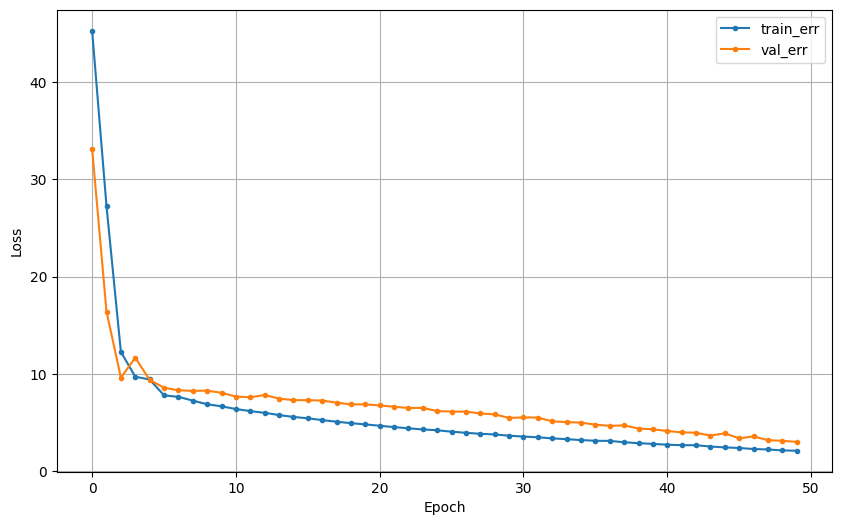

In [17]:
dl_history_plot(hist)

* 검증 평가

In [18]:
pred2 = model2.predict(x_val)
print(f'RMSE : {root_mean_squared_error(y_val, pred2)}')
print(f'MAE  : {mean_absolute_error(y_val, pred2)}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
RMSE : 1.7716809657179575
MAE  : 1.3763715262413023


## 4.실험1 : 필수
* 모델 구조를 고정
    * 입력 --> 은닉층 --> 출력층
* 은닉층의 노드 수를 조정해 봅시다.
    * 노드 : 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150
* 모델링 설계 코드를 함수로 생성
    * 입력 : 노드 수
    * 출력(return) : validation 성능(MAE)
* for loop로 반복 실행




### (1) 모델링 함수 생성

In [19]:
def modeling_test1(node) :

    # 노드 수를 입력 받아 모델 선언
    clear_session()
    model = Sequential([Input(shape = (nfeatures,)),
                        Dense(node, activation = 'relu' ),
                        Dense(1) ] )

    model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')
    model.fit(x_train, y_train, epochs = 50, verbose = False)

    pred = model.predict(x_val)
    mae = mean_absolute_error(y_val, pred)

    return mae

### (2) 반복실행

In [20]:
modeling_test1(2)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


1.9845600128173828

In [21]:
modeling_test1(10)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


1.1139851766824722

In [22]:
modeling_test1(50)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


1.0383814973235128

In [23]:
modeling_test1(100)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


1.161228883743286

In [24]:
modeling_test1(120)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


1.080818705201149

In [25]:
modeling_test1(150)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


1.0784116975069047

## 5.실험2 : 선택
* 다음 항목은 선택사항입니다.
* 은닉층 노드 수를 10으로 고정시켜 놓고, 은닉층을 증가시켜 봅시다.
* Hidden Layer 수 : 1,2,3,4,5,6,7,8,9,10
    * 각 레이어의 노드 수 : 10개
* 함수 생성
    * 입력 : 레이어 수
    * 출력(return) : validation 성능(MAE)
* for loop로 반복 실행




### (1) 모델링 함수 생성

In [26]:
def modeling_test2(layer) :

    # 레이어 수를 입력 받아 모델 선언
    clear_session()
    model = Sequential([Input(shape = (nfeatures,))])

    # Add hidden layers based on the 'layer' parameter
    for _ in range(layer):
        model.add(Dense(10, activation='relu'))

    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate = 0.01), loss = 'mse')
    model.fit(x_train, y_train, epochs = 50, verbose = False)

    pred = model.predict(x_val)
    mae = mean_absolute_error(y_val, pred)

    return mae

### (2) 반복실행

In [27]:
modeling_test2(1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


1.1469637664556505

In [28]:
modeling_test2(3)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


1.087299746513367

In [29]:
modeling_test2(5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


1.2436106274127958

In [30]:
modeling_test2(8)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1.2769782762527466

In [31]:
modeling_test2(10)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


1.208030701637268